In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

plt.rcParams['figure.figsize'] = [20, 20]

Loading the data and setting the column names and printing the head

In [2]:
d=pd.read_csv('ML-Python-Lab-Data.csv')
d.columns=['Index','Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
d.head()

,Index,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0
1,2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0
2,3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1.0
3,4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0
4,5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0.0


Printing the shape of the data

In [45]:
d.shape

(4176, 10)

Exploring the data descriptions

In [46]:
d.describe()

,Index,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,3996.000000,3975.000000,3986.000000,3989.000000,3982.000000,4001.000000,3989.000000,4176.000000
mean,2088.500000,0.525348,0.408459,0.139680,0.830656,0.360715,0.181015,0.239819,0.861351
std,1205.651691,0.119579,0.098738,0.041987,0.490665,0.221117,0.109431,0.139775,0.762398
min,1.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,0.000000
25%,1044.750000,0.450000,0.350000,0.115000,0.444500,0.188000,0.094000,0.130000,0.000000
50%,2088.500000,0.545000,0.425000,0.140000,0.802500,0.339000,0.171500,0.235000,1.000000
75%,3132.250000,0.615000,0.480000,0.165000,1.154500,0.503375,0.253500,0.330000,1.000000
max,4176.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,3.000000


Plotting the boxplot

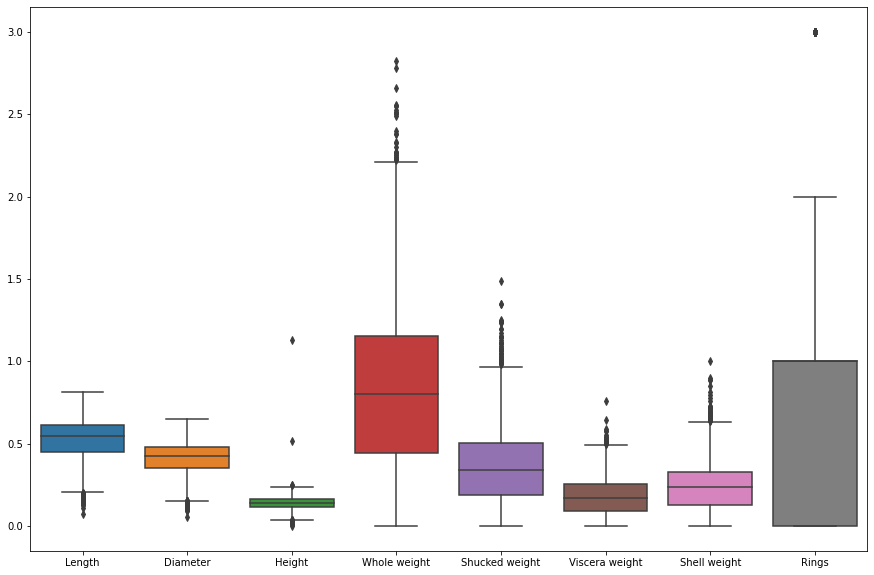

In [35]:
plt.figure(figsize=(15,10))
sns.boxplot(data = d.iloc[:, 1:]);
# df.iloc[:, 1:].boxplot(figsize=(10, 10))
# plt.show()

Visualizing the pairplot

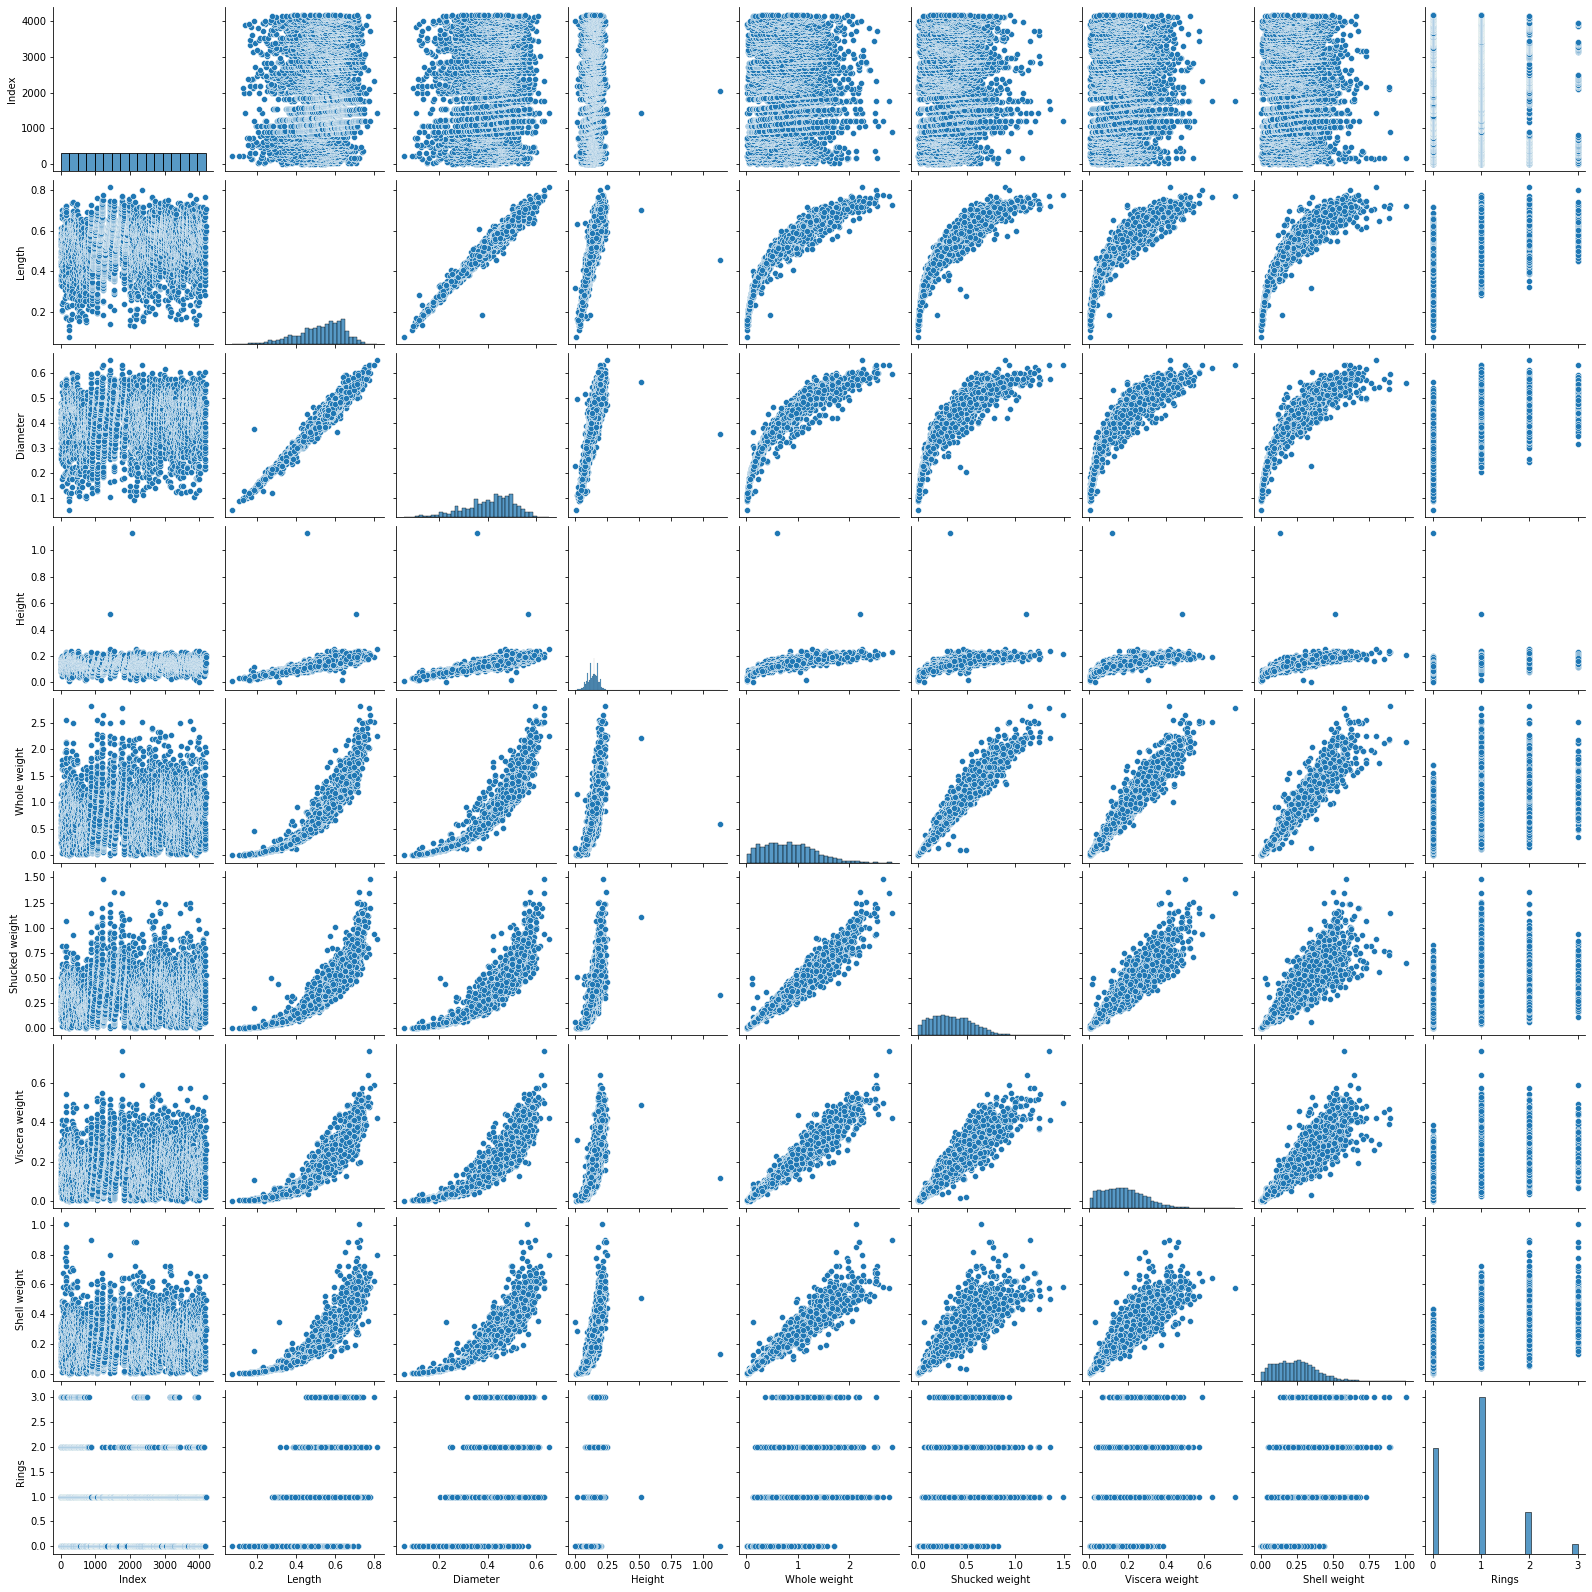

In [50]:
%matplotlib inline
#sns.pairplot(d, hue='Rings', height=2);
sns.pairplot(d);

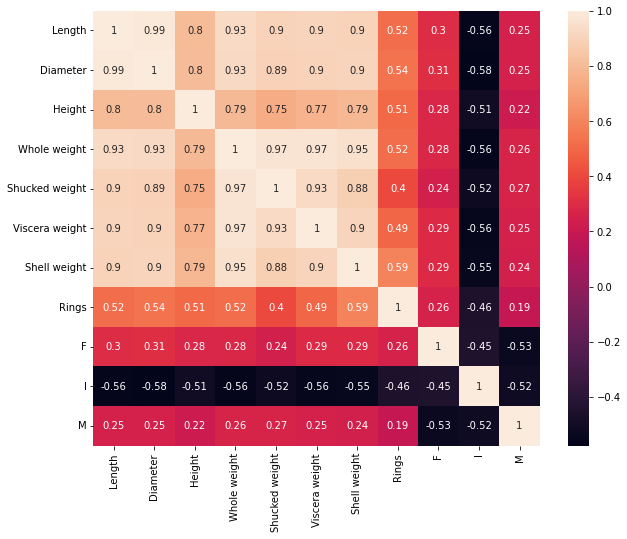

In [27]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

Some of the attributes have linear dependency.
Distributions contains few outliers.
The classes are unequally distributed.

From the above explorations it can be observed that the featur Index is not relevant.
Thus droping feature 'Index'

In [6]:
d=d.drop('Index',axis=1)
d.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,0.0
1,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,1.0
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1.0
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0.0


Checking for Missing values and if found, dropping them.

In [7]:
# printing the number of nan values
d.shape[0]-d.dropna().shape[0]

1125

In [8]:
# dropping rows with missing values
print("Before Dropping Null values the dataset has {} rows ".format(d.shape[0]))
df = d.dropna().copy()
print("After dropping rows with nulls the dataset has {} rows".format(df.shape[0]))

Before Dropping Null values the dataset has 4176 rows 
After dropping rows with nulls the dataset has 3051 rows


In [21]:
#finding unique values of feature 'Sex'
df['Sex'].unique()

array(['M', 'I', 'F'], dtype=object)

Encoding categorical values of coloum 'Sex'

In [15]:
#df['Sex']=df['Sex'].apply(lambda x: 0 if (x=='F') else(1 if (x=='I')  else 2))
# using onehotencoder
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
transformed = ohe.fit_transform(df[['Sex']])
df[ohe.categories_[0]] = transformed.toarray()
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1.0,0.0,0.0,1.0
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,0.0,1.0,0.0
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0.0,0.0,1.0,0.0
5,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,3.0,1.0,0.0,0.0
6,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,2.0,1.0,0.0,0.0


Seperating the feature X and Target Y and printing their shape

In [16]:
X=df.drop(['Sex','Rings'],axis=1)
Y=df['Rings']
print(X.shape, Y.shape)
X.head()

(3051, 10) (3051,)


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,F,I,M
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0.0,0.0,1.0
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0.0,1.0,0.0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,0.0,1.0,0.0
5,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,1.0,0.0,0.0
6,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,1.0,0.0,0.0


Splitting the data into training and testing set

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, random_state=15, train_size = 0.3)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(915, 10) (2136, 10) (915,) (2136,)


## 1. Tuning hyperparameter using Model 1 : Decision Tree

In [18]:
parameter_dt = [{'max_depth': list(range(1,20))}]

estimator_dt = GridSearchCV(DecisionTreeClassifier(), parameter_dt,
                       scoring= 'f1_macro', 
                       cv = 5,
                       n_jobs = 2
                       )
estimator_dt.fit(Xtrain,ytrain)
best_estimator_dt=estimator_dt.best_estimator_
score_dt=estimator_dt.best_score_
print("Estimator: {}\t - Score: {:4.2f}%".format(best_estimator_dt, score_dt*100))
avg_scores_dt=estimator_dt.cv_results_['mean_test_score']

Estimator: DecisionTreeClassifier(max_depth=5)	 - Score: 48.00%


Model 1(Decision Tree) : Plotting using the parameter_values and the list of scores

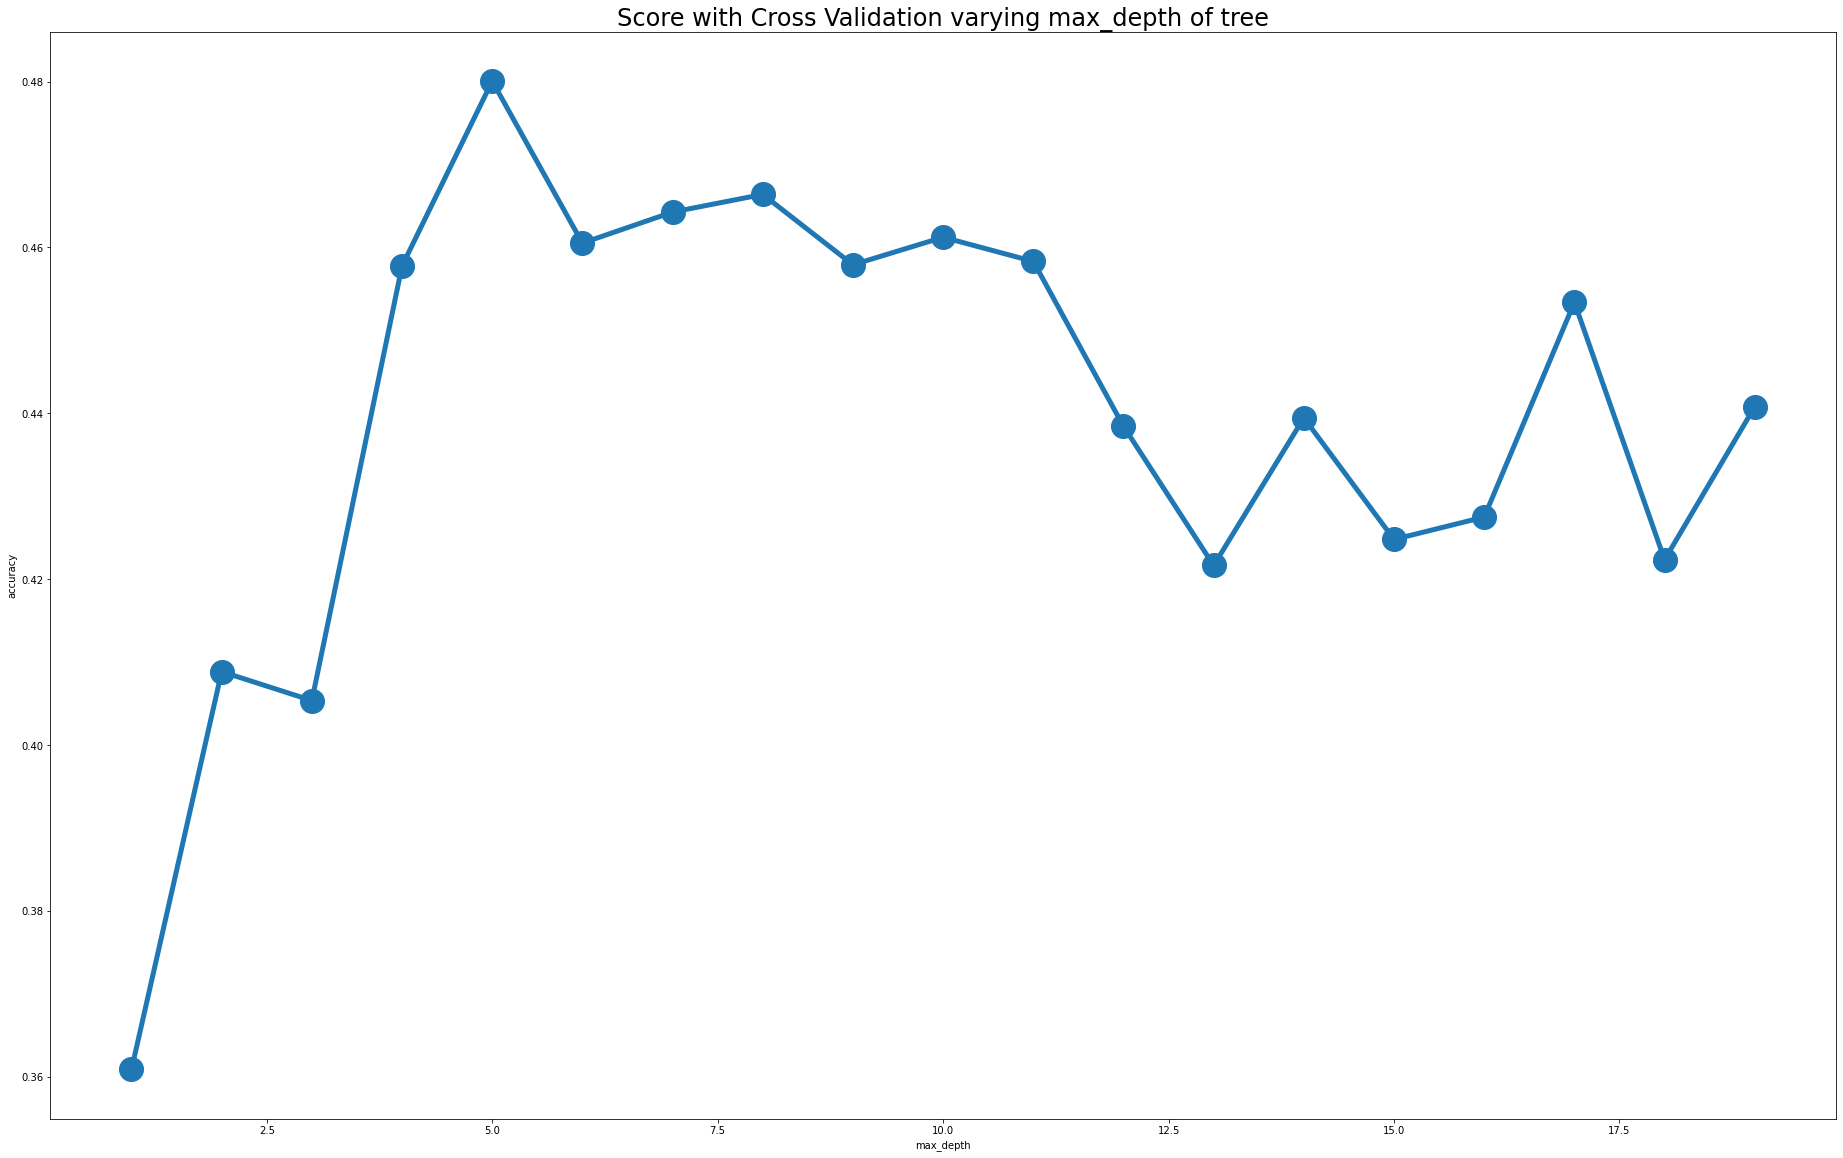

In [19]:
%matplotlib inline
plt.figure(figsize=(32,20))
plt.plot(range(1,20), avg_scores_dt, '-o', linewidth=5, markersize=24)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.title("Score with Cross Validation varying max_depth of tree", fontsize = 24)
plt.show();

Model 1(Decision Tree) : A more detailed information : the classification report, using the true and predicted target values

In [20]:
y_predicted_dt = estimator_dt.predict(Xtest)
print(classification_report(ytest, y_predicted_dt))

              precision    recall  f1-score   support

         0.0       0.77      0.65      0.71       665
         1.0       0.61      0.77      0.68       997
         2.0       0.49      0.38      0.43       409
         3.0       0.23      0.05      0.08        65

    accuracy                           0.64      2136
   macro avg       0.53      0.46      0.47      2136
weighted avg       0.63      0.64      0.62      2136



Model 1(Decision Tree) :Confusion Matrix on the test set

Here we can see some important information, combined with the previous f1 score, recall and precision.


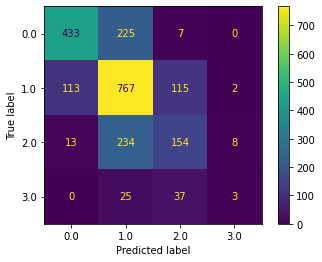

In [21]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(estimator_dt, Xtest, ytest);
print('Here we can see some important information, combined with the previous f1 score, recall and precision.')

## 2. Tuning hyperparameter using Crossvalidation of Model 2 : Gaussian Naive Bayes

In [22]:
parameter_nb = [{'var_smoothing': [10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-07, 1e-8, 1e-9, 1e-10]}]

estimator_nb = GridSearchCV(GaussianNB(), parameter_nb,
                       scoring='f1_macro', 
                       cv = 5,
                       n_jobs = 2
                       )
estimator_nb.fit(Xtrain,ytrain)
best_estimator_nb=estimator_nb.best_estimator_
score_nb=estimator_nb.best_score_
print("Estimator: {}\t - Score: {:4.2f}%".format(best_estimator_nb, score_nb*100))
avg_scores_nb=estimator_nb.cv_results_['mean_test_score']

Estimator: GaussianNB(var_smoothing=0.1)	 - Score: 38.83%


Model 2(Naive Bayes) : Plotting using the parameter_values and the list of scores

In [33]:
print("var-smoothing\t   average score",)
for i in zip([10, 1, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-07, 1e-8, 1e-9, 1e-10],avg_scores_nb):
    print(i[0],"\t\t",i[1])

var-smoothing	   average score
10 		 0.16630126078301263
1 		 0.34211278991803484
0.1 		 0.3883189631191281
0.01 		 0.33990105737603954
0.001 		 0.31371894908666514
0.0001 		 0.2967955801631243
1e-05 		 0.2810709788363839
1e-06 		 0.2592777805832782
1e-07 		 0.2561200174593944
1e-08 		 0.25189050369317423
1e-09 		 0.24816065346752553
1e-10 		 0.24420384022414227


Model 2(Naive Bayes) : A more detailed information : the classification report, using the true and predicted target values

In [25]:
y_predicted_nb = estimator_nb.predict(Xtest)
print(classification_report(ytest, y_predicted_nb))

              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72       665
         1.0       0.58      0.72      0.64       997
         2.0       0.22      0.02      0.04       409
         3.0       0.12      0.15      0.14        65

    accuracy                           0.59      2136
   macro avg       0.40      0.42      0.39      2136
weighted avg       0.53      0.59      0.54      2136



Model 2(Naive Bayes) : Confusion Matrix on test set

Here we can see some important information, combined with the previous f1 score, recall and precision.


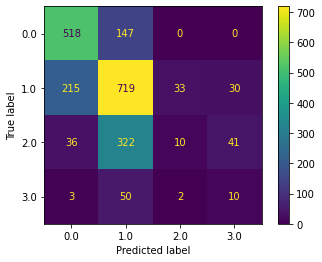

In [26]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(estimator_nb, Xtest, ytest);
print('Here we can see some important information, combined with the previous f1 score, recall and precision.')

From the above exploration it can be seen that Decision Tree performs better than Gaussian Naive Bayes in Classifying the classes.
Decision Tree gives higher f1-score and accuracy than Gaussian Naive Bayes.
Where Gaussian Naive Bayes could not classify any of the Class 3 data objects while Decision Tree could.